<a href="https://colab.research.google.com/github/FaatimaMukhtaar/INSE6220/blob/main/Exploring_Software_Defect_Patterns_in_JM1_Dataset_with_PCA_and_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title :   Exploring Software Defect Patterns in JM1 Dataset with PCA and Classification Models
### BY
### FATIMA MUKHTAR

**INSTALL PYCARET**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [1]:
# install slim version (default)
!pip install pycaret

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

In [3]:
!pip install pycaret[analysis]

**Principal Component Analysis**
PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Dataset**

The JM1 dataset comprises software modules from a NASA project, designed to evaluate software quality metrics and predict potential defects. This dataset is widely used in software engineering and defect prediction studies to assess and improve software reliability. Each instance in the dataset represents a software module, with its attributes representing various software complexity and quality measures.

ATTRIBUTE INFORMATION
 the major attributes in the dataset are

loc (Lines of Code): The size of the code module measured in lines.
v(g) (Cyclomatic Complexity): A measure of the code’s decision complexity.
ev(g) (Essential Complexity): The complexity of the control flow structure.
iv(g) (Design Complexity): Complexity in terms of module integration.
branchCount: The number of branch instructions in the module.
uniq_Op (Unique Operators): Number of unique operators used in the module.
uniq_Opnd (Unique Operands): Number of unique operands used in the module.
total_Op (Total Operators): Total occurrences of operators.
total_Opnd (Total Operands): Total occurrences of operands.
defects (Target Variable): A binary attribute indicating whether the module is defective (True) or not (False).

**READ DATASET**

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/FaatimaMukhtaar/INSE6220/refs/heads/main/jm1.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/FaatimaMukhtaar/INSE6220/refs/heads/main/jm1.csv')
df.head(25)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True
5,31.0,2.0,1.0,2.0,111.0,582.52,0.08,12.25,47.55,7135.87,...,19,0,5,0,14.0,24.0,69.0,42.0,3.0,True
6,78.0,9.0,5.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,17.0,True
7,8.0,1.0,1.0,1.0,16.0,50.72,0.36,2.80,18.11,142.01,...,5,0,1,0,4.0,5.0,9.0,7.0,1.0,True
8,24.0,2.0,1.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,True
9,143.0,22.0,20.0,10.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,43.0,True


**DATASET INFO**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13204 entries, 0 to 13203
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                13204 non-null  float64
 1   v(g)               13204 non-null  float64
 2   ev(g)              13204 non-null  float64
 3   iv(g)              13204 non-null  float64
 4   n                  13204 non-null  float64
 5   v                  13204 non-null  float64
 6   l                  13204 non-null  float64
 7   d                  13204 non-null  float64
 8   i                  13204 non-null  float64
 9   e                  13204 non-null  float64
 10  b                  13204 non-null  float64
 11  t                  13204 non-null  float64
 12  lOCode             13204 non-null  int64  
 13  lOComment          13204 non-null  int64  
 14  lOBlank            13204 non-null  int64  
 15  locCodeAndComment  13204 non-null  int64  
 16  uniq_Op            132

In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  4296


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Drop Duplicate Rows**

In [10]:

df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print("DataFrame after dropping duplicate rows:")
print(df.head(25))




DataFrame after dropping duplicate rows:
      loc  v(g)  ev(g)  iv(g)       n        v     l      d       i  \
0     1.1   1.4    1.4    1.4     1.3     1.30  1.30   1.30    1.30   
1     1.0   1.0    1.0    1.0     1.0     1.00  1.00   1.00    1.00   
2    72.0   7.0    1.0    6.0   198.0  1134.13  0.05  20.31   55.85   
3   190.0   3.0    1.0    3.0   600.0  4348.76  0.06  17.06  254.87   
4    37.0   4.0    1.0    4.0   126.0   599.12  0.06  17.19   34.86   
5    31.0   2.0    1.0    2.0   111.0   582.52  0.08  12.25   47.55   
6    78.0   9.0    5.0    4.0     0.0     0.00  0.00   0.00    0.00   
7     8.0   1.0    1.0    1.0    16.0    50.72  0.36   2.80   18.11   
8    24.0   2.0    1.0    2.0     0.0     0.00  0.00   0.00    0.00   
9   143.0  22.0   20.0   10.0     0.0     0.00  0.00   0.00    0.00   
10   73.0  10.0    4.0    6.0     0.0     0.00  0.00   0.00    0.00   
11   83.0  11.0   10.0    7.0     0.0     0.00  0.00   0.00    0.00   
12   12.0   3.0    1.0    1.0    37.

In [11]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


Exploratory Data Analysis

sns.pairplot is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

**PAIRPLOT (Selected Features Grouped by Class) AND PIE CHART**

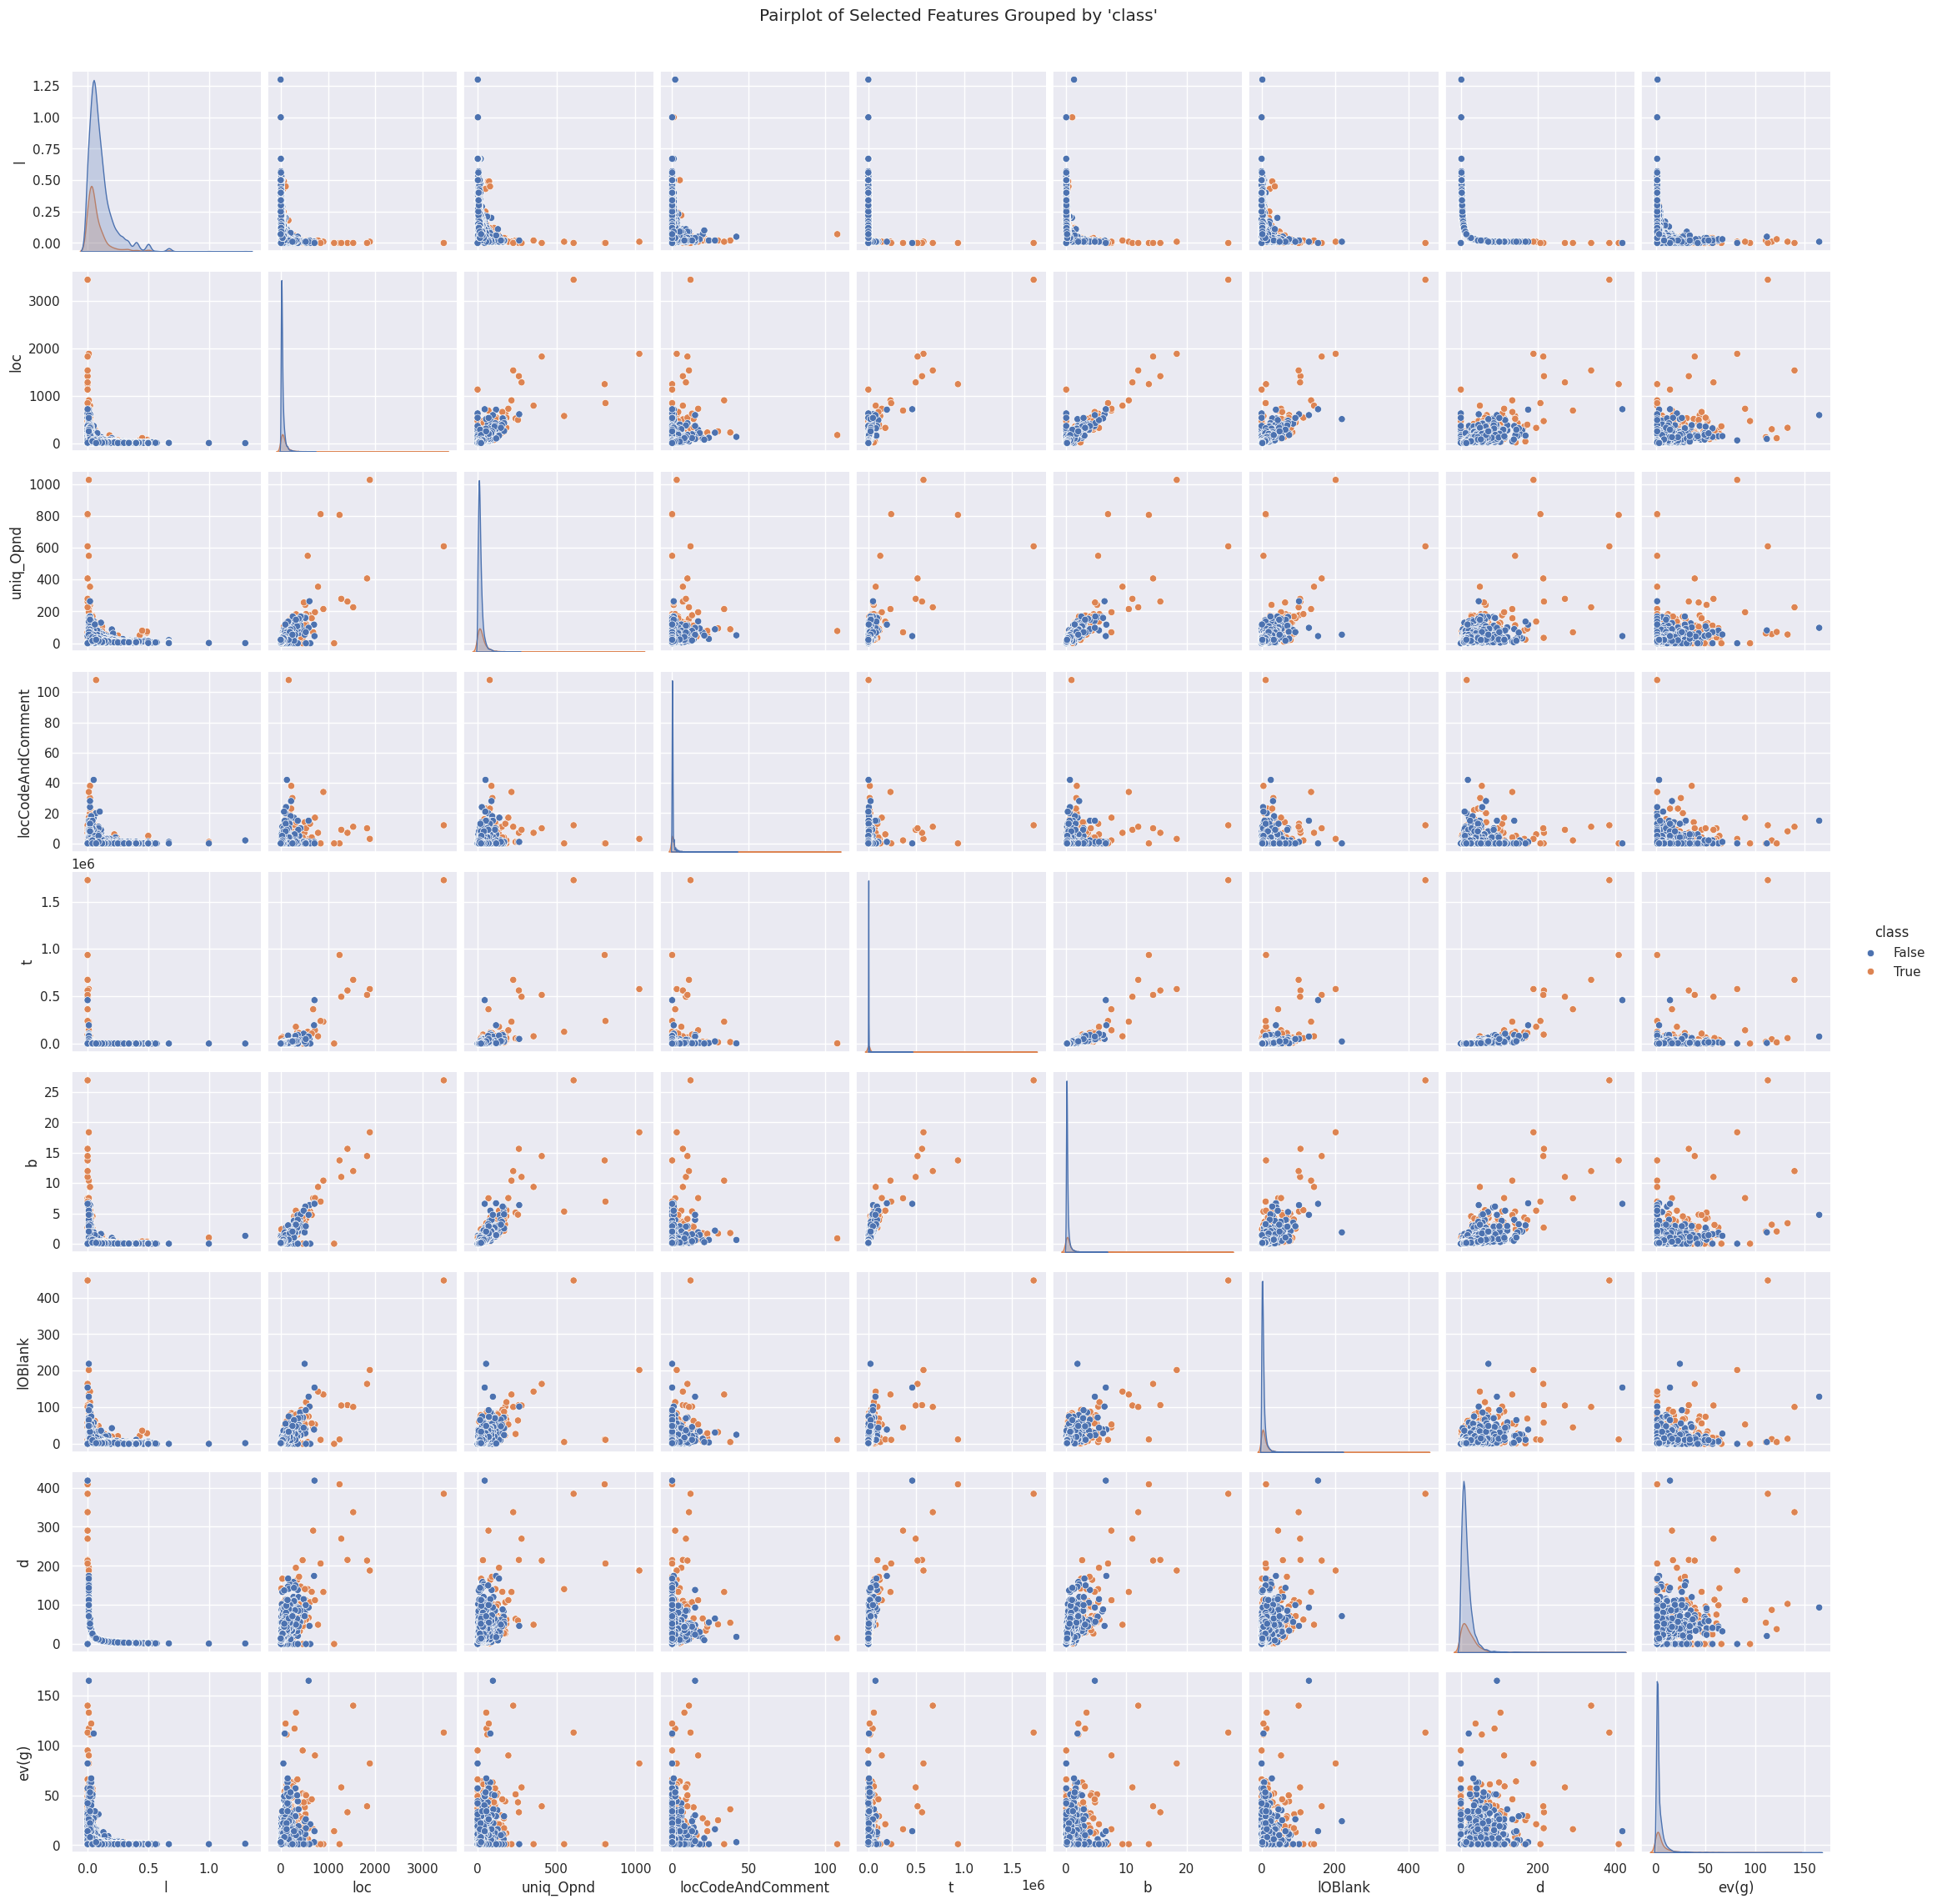

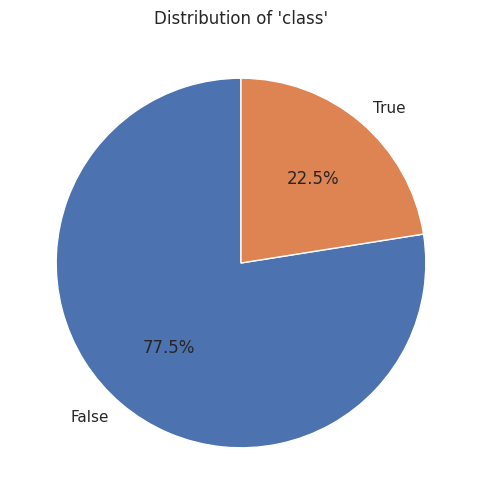

In [12]:

# Selected features and hue column (defects)
selected_features = ['l', 'loc', 'uniq_Opnd', 'locCodeAndComment', 't', 'b', 'lOBlank', 'd', 'ev(g)']
hue_column = 'defects'

# Verify the 'defects' column exists
if hue_column not in df.columns:
    raise ValueError(f"Column '{hue_column}' not found in the dataset!")

# Filter the data to include only selected features and the hue column
df_selected = df[selected_features + [hue_column]]

# Rename the 'defects' column to 'class' for better readability
df_selected = df_selected.rename(columns={hue_column: 'class'})

# Pairplot using 'class' as the hue
sns.pairplot(df_selected, hue='class', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features Grouped by 'class'", y=1.02)
plt.show()

# Create a pie chart for the distribution of 'class'
y = df_selected['class']
y.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.ylabel('')
plt.title("Distribution of 'class'")
plt.show()


**Statistical summary of the selected features**

In [13]:
# Define the target column and features
#target_column = 'defects'  # Target column
#selected_features = ['l', 'loc', 'uniq_Opnd', 'locCodeAndComment', 't', 'b', 'lOBlank', 'd', 'ev(g)']  # Selected features

# Drop the target column to create the feature matrix
X = df[selected_features]  # Only use the selected features

# Display the first 10 rows of the feature matrix
print("First 10 rows of the feature matrix (X):")
print(X.head(10))

# Display the statistical summary of the selected features
print("\nStatistical summary of the selected features:")
print(X.describe().transpose())


First 10 rows of the feature matrix (X):
      l    loc  uniq_Opnd  locCodeAndComment        t     b  lOBlank      d  \
0  1.30    1.1        1.2                  2     1.30  1.30        2   1.30   
1  1.00    1.0        1.0                  1     1.00  1.00        1   1.00   
2  0.05   72.0       36.0                  1  1279.39  0.38        8  20.31   
3  0.06  190.0      135.0                  2  4122.37  1.45       28  17.06   
4  0.06   37.0       16.0                  0   572.07  0.20        6  17.19   
5  0.08   31.0       24.0                  0   396.44  0.19        5  12.25   
6  0.00   78.0        0.0                  0     0.00  0.00        0   0.00   
7  0.36    8.0        5.0                  0     7.89  0.02        1   2.80   
8  0.00   24.0        0.0                  0     0.00  0.00        0   0.00   
9  0.00  143.0        0.0                  0     0.00  0.00        0   0.00   

   ev(g)  
0    1.4  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  
6    5.0  
7

**APPLYING PCA**


Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of large datasets while preserving as much variability as possible. It transforms the original variables into a new set of uncorrelated variables called principal components, ordered by the amount of variance they capture from the data. This process simplifies the complexity of high-dimensional data, making it easier to visualize and analyze

**Standardize the Data**

In [14]:

# Define the target column and selected features
#target_column = 'defects'  # Target column
#selected_features = ['l', 'loc', 'uniq_Opnd', 'locCodeAndComment',
                    # 't', 'b', 'lOBlank', 'd', 'ev(g)']  # Selected features

# Drop the target column to create the feature matrix
#X = df[selected_features]  # Only use the selected features

# Apply StandardScaler to scale the features
Xs = StandardScaler().fit_transform(X)

# Convert the scaled data back into a DataFrame
Xcols = X.columns  # Save the column names
X = pd.DataFrame(Xs, columns=Xcols)

# Display the first 10 rows of the scaled feature matrix
print("First 10 rows of the scaled feature matrix (X):")
print(X.head(10))

# Display the statistical summary of the scaled features
print("\nStatistical summary of the scaled features:")
print(X.describe().transpose())




First 10 rows of the scaled feature matrix (X):
           l       loc  uniq_Opnd  locCodeAndComment         t         b  \
0  11.228055 -0.577260  -0.635331           0.742365 -0.092916  1.460723   
1   8.422868 -0.578466  -0.642303           0.265375 -0.092927  1.036137   
2  -0.460225  0.278085   0.577824           0.265375 -0.044964  0.158659   
3  -0.366719  1.701649   4.029038           0.742365  0.061700  1.673016   
4  -0.366719 -0.144159  -0.119391          -0.211615 -0.071501 -0.096093   
5  -0.179707 -0.216543   0.159495          -0.211615 -0.078091 -0.110246   
6  -0.927757  0.350470  -0.677163          -0.211615 -0.092965 -0.379150   
7   2.438468 -0.494018  -0.502860          -0.211615 -0.092669 -0.350844   
8  -0.927757 -0.300992  -0.677163          -0.211615 -0.092965 -0.379150   
9  -0.927757  1.134636  -0.677163          -0.211615 -0.092965 -0.379150   

    lOBlank         d     ev(g)  
0 -0.323493 -0.761484 -0.332116  
1 -0.416092 -0.776704 -0.386442  
2  0.232100  

**Observations and Variables**

In [15]:
# Extract observations (indices) and variables (columns)
observations = list(X.index)
variables = list(X.columns)

**BOX AND WHISKERS PLOTS**

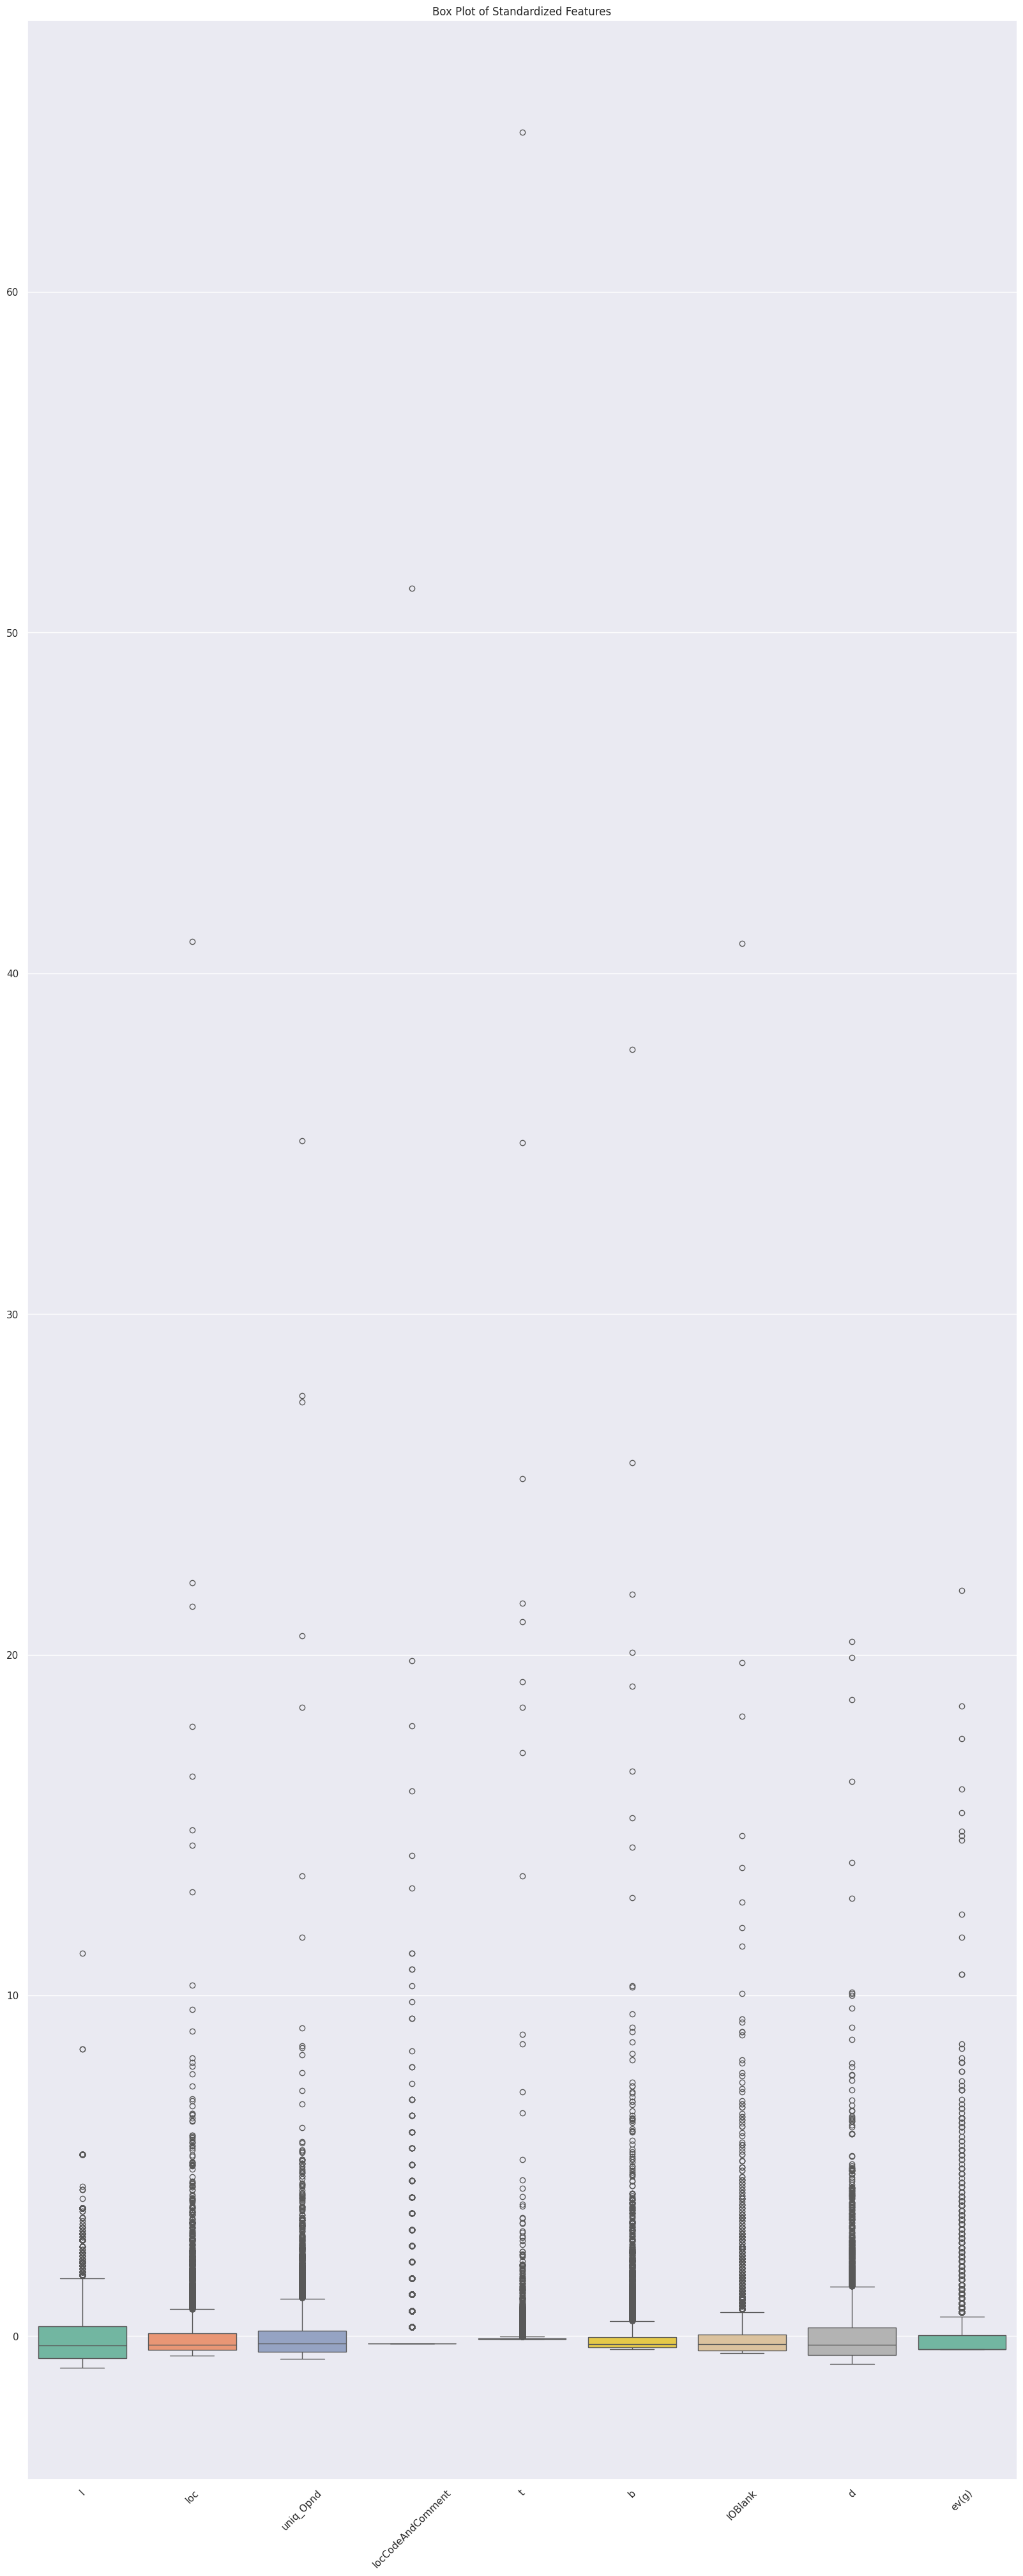

In [16]:
# Generate the Box Plot
plt.figure(figsize=(20, 50))  # Set the figure size
ax = sns.boxplot(data=X, orient="v", palette="Set2")  # Create the box plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
plt.title("Box Plot of Standardized Features")  # Add a title
plt.show()

**BOXPLOT WITH DATA POINTS OVERLAID USING STRIPPLOT**

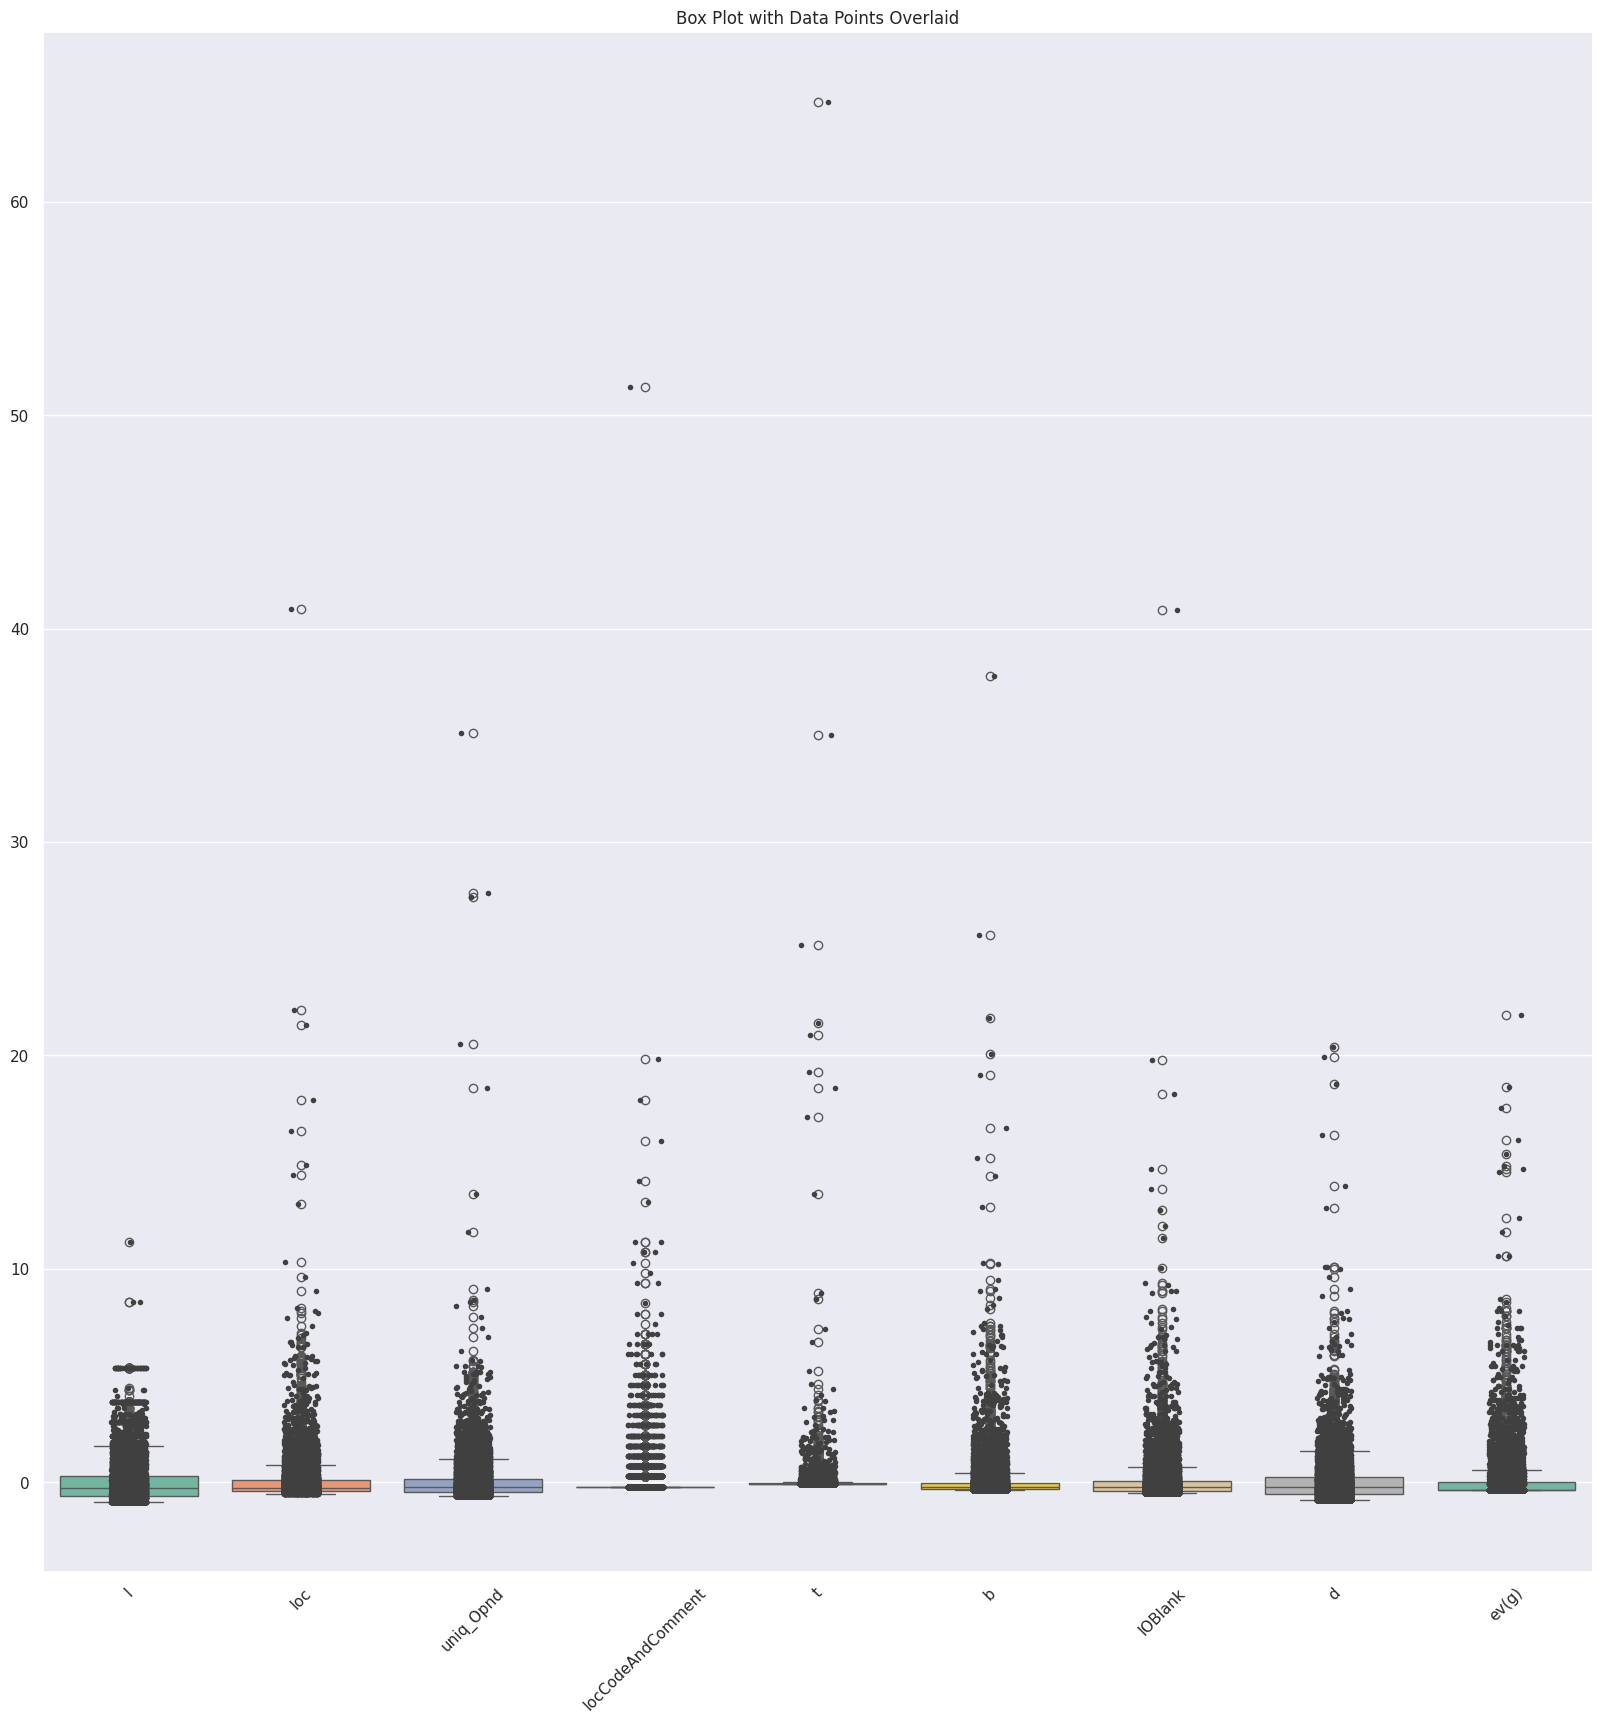

In [17]:
# Create a boxplot with data points overlaid using stripplot
plt.figure(figsize=(20, 20))  # Set the figure size
ax = sns.boxplot(data=X, orient="v", palette="Set2")  # Box plot
sns.stripplot(data=X, color=".25", jitter=True, size=4)  # Overlayed data points (stripplot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
plt.title("Box Plot with Data Points Overlaid")
plt.show()

**CORELATION MATRIX**

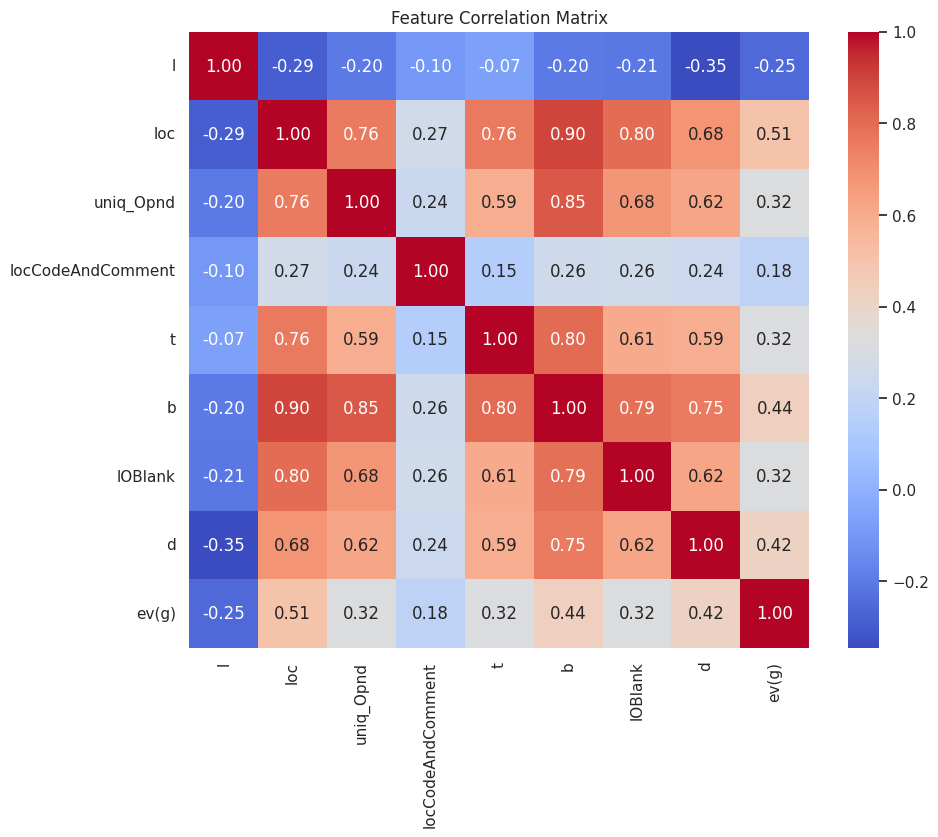

In [19]:
plt.figure(figsize=(10, 8))
# Assuming 'features' should contain the list of selected_features
features = ['l', 'loc', 'uniq_Opnd', 'locCodeAndComment', 't', 'b', 'lOBlank', 'd', 'ev(g)']
corr = df[features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

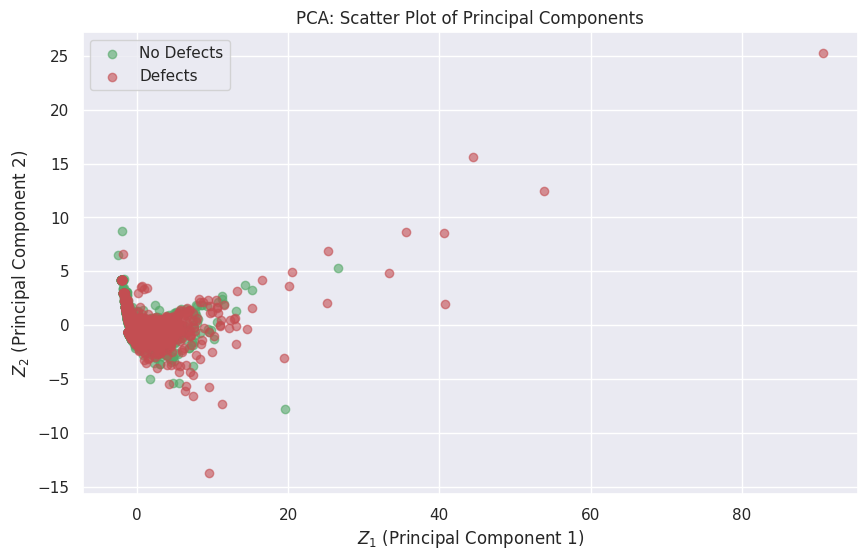

In [20]:


# Standardize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[selected_features])

# Target variable (defects): Convert True/False to integers for plotting
#y = df[target_column].astype(int)  # True -> 1, False -> 0

# Apply PCA to the standardized features
pca = PCA()
Z = pca.fit_transform(X)

# Find indices for the two classes in 'defects'
idx_NoDefect = np.where(y == 0)  # No defects (class 0)
idx_Defect = np.where(y == 1)    # Defects (class 1)

# Scatter plot of the first two principal components (Z1 and Z2)
plt.figure(figsize=(10, 6))
plt.scatter(Z[idx_NoDefect, 0], Z[idx_NoDefect, 1], c='g', label='No Defects', alpha=0.6)
plt.scatter(Z[idx_Defect, 0], Z[idx_Defect, 1], c='r', label='Defects', alpha=0.6)
plt.legend()
plt.xlabel('$Z_1$ (Principal Component 1)')
plt.ylabel('$Z_2$ (Principal Component 2)')
plt.title("PCA: Scatter Plot of Principal Components")
plt.show()



**EIGENVECTORS**

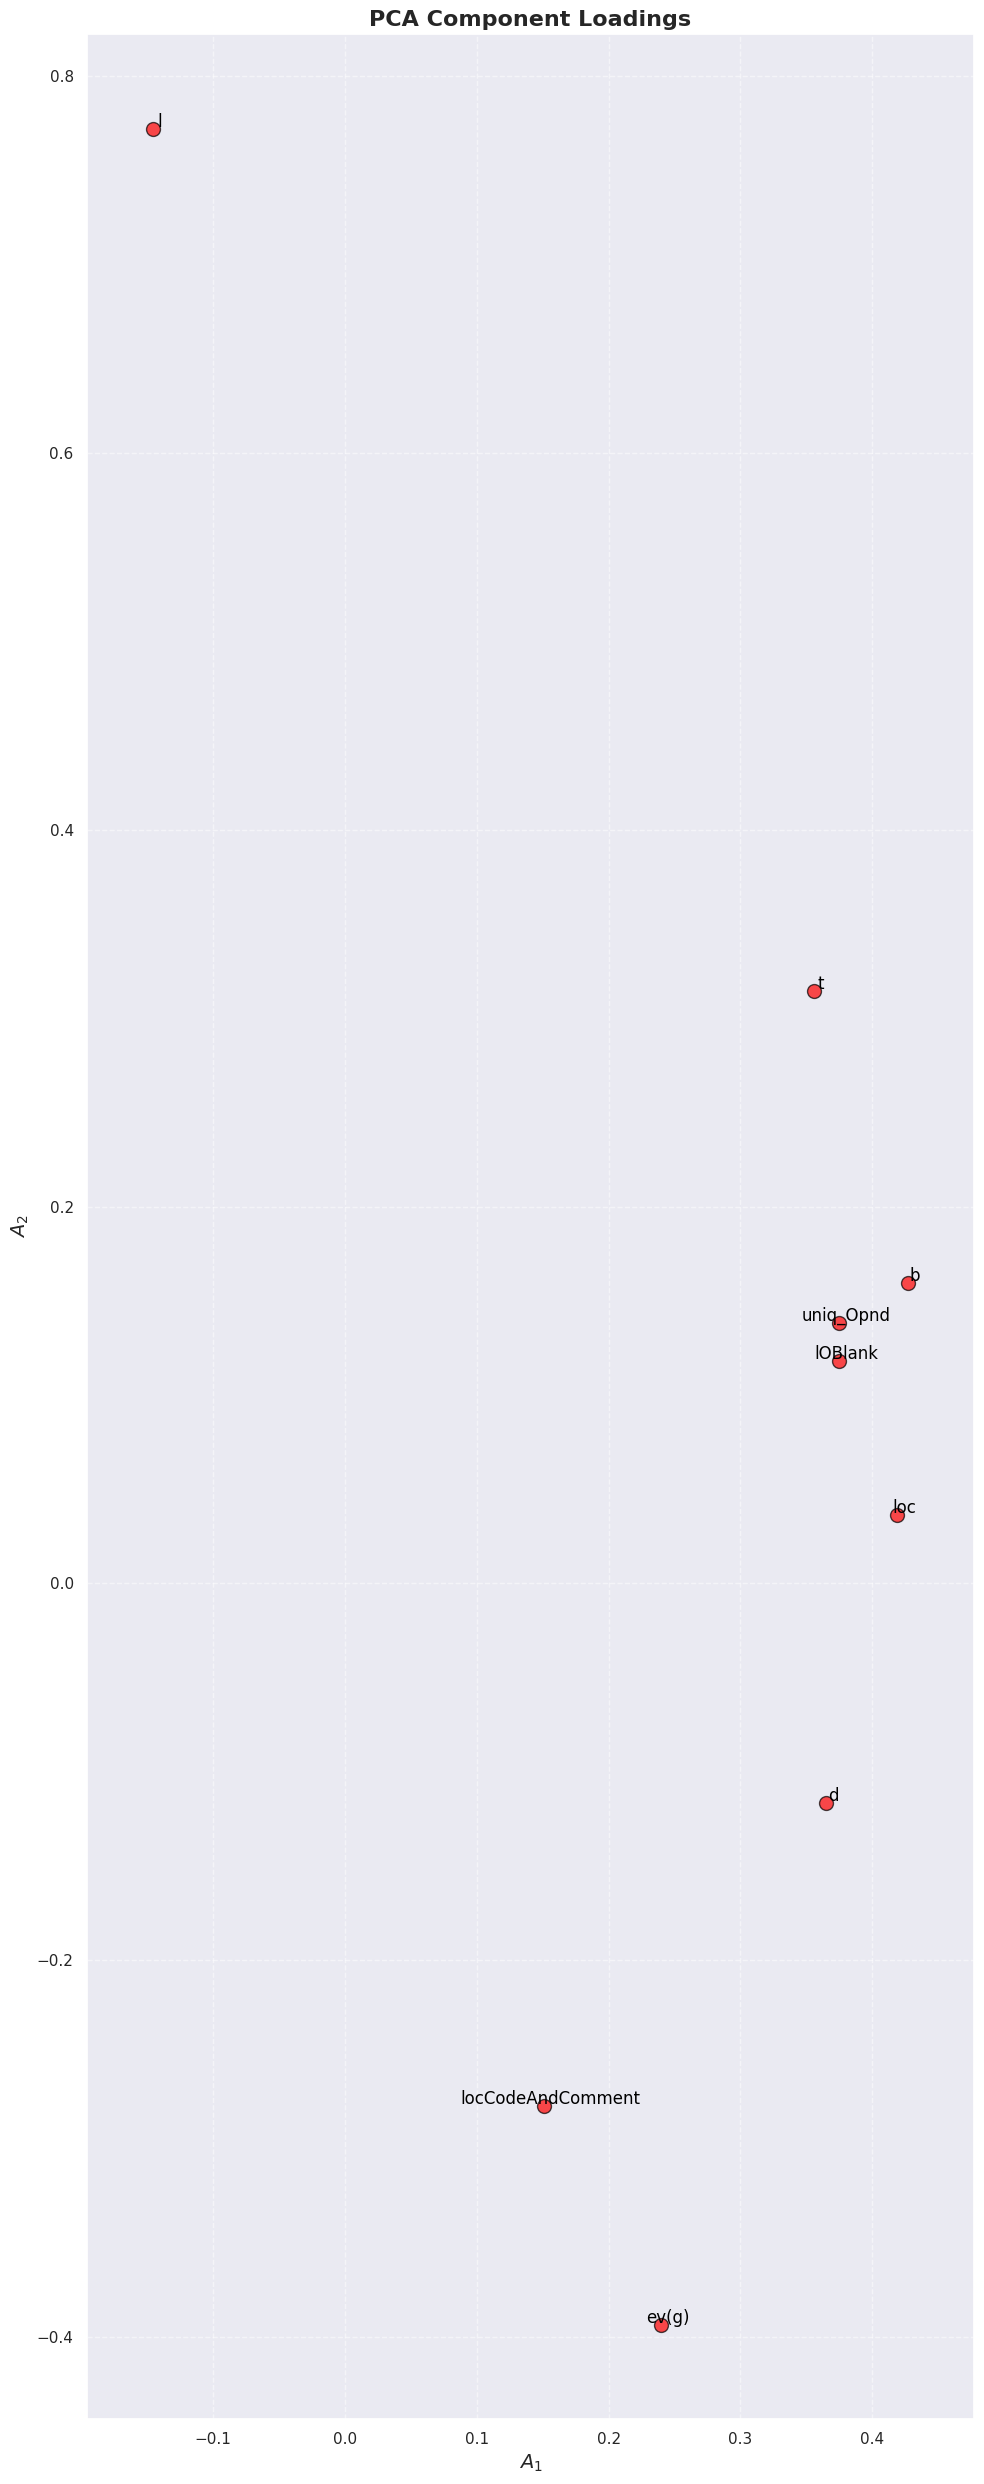

In [21]:
A = pca.components_.T
plt.figure(figsize=(10, 25))
plt.scatter(A[:, 0], A[:, 1], c='red', s=100, edgecolor='black', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('$A_1$', fontsize=14, fontweight='bold')
plt.ylabel('$A_2$', fontsize=14, fontweight='bold')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points',
                 ha='center', va='center', fontsize=12, color='black')

plt.title('PCA Component Loadings', fontsize=16, fontweight='bold')

plt.xlim(min(A[:, 0]) - 0.05, max(A[:, 0]) + 0.05)
plt.ylim(min(A[:, 1]) - 0.05, max(A[:, 1]) + 0.05)
plt.tight_layout()
plt.show()


**SCATTER PLOT OF FEATURE LOADING WITH COLOR AND SIZE ENCODING**

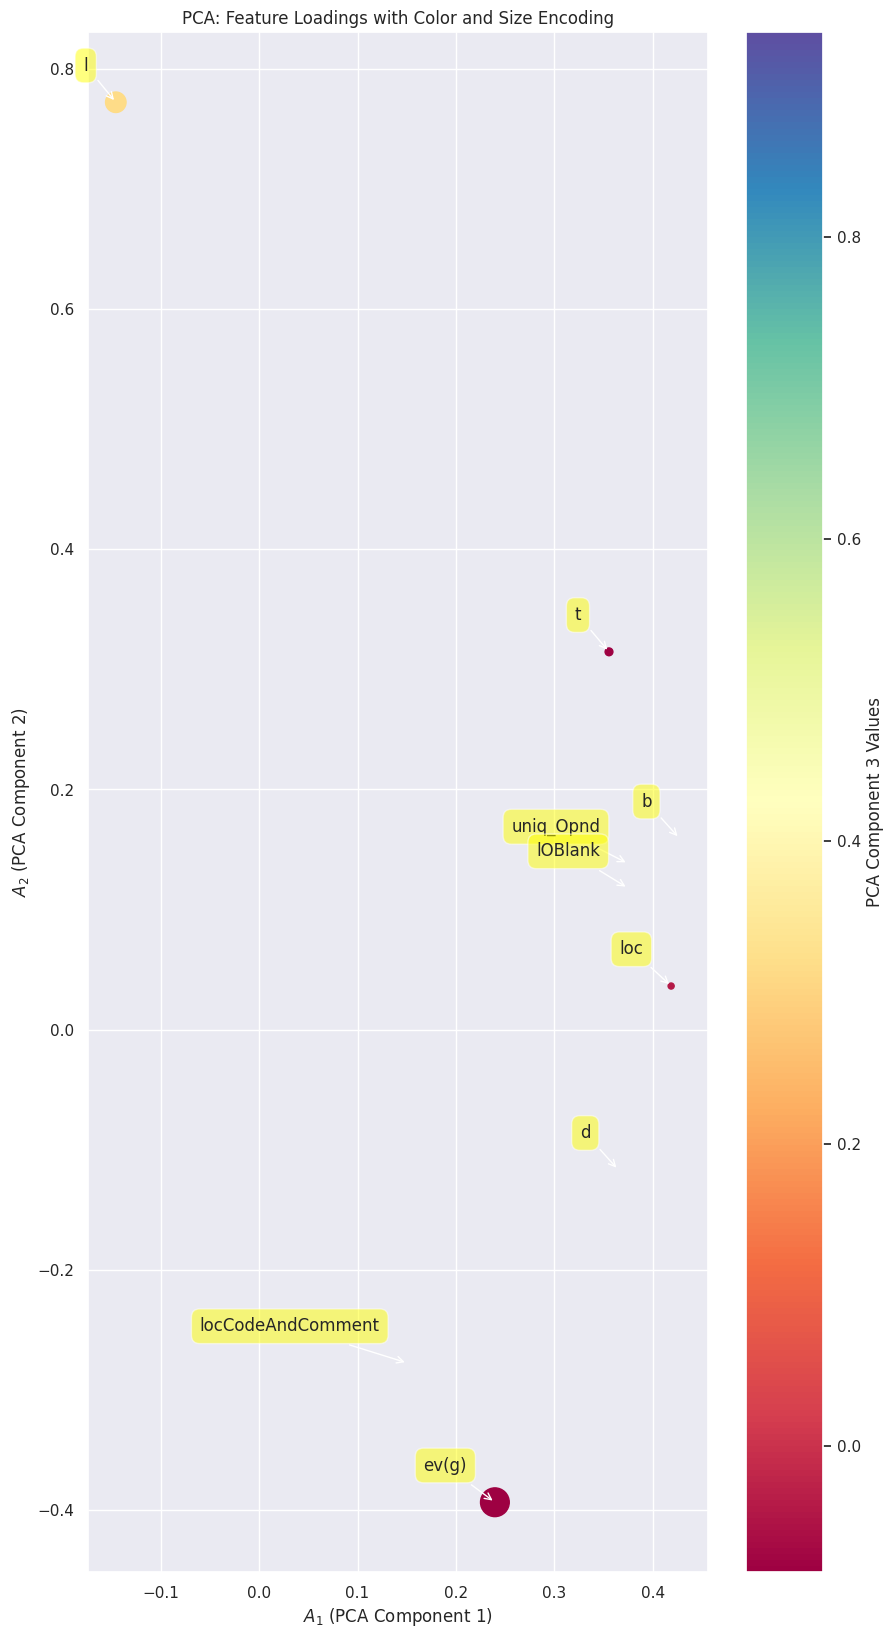

In [22]:
# Scatter plot of feature loadings with color and size encoding
plt.figure(figsize=(10, 20))
plt.scatter(A[:, 0], A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$ (PCA Component 1)')
plt.ylabel('$A_2$ (PCA Component 2)')
plt.title("PCA: Feature Loadings with Color and Size Encoding")

# Annotate each point with the feature name
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.colorbar(label='PCA Component 3 Values')  # Add a color bar for clarity
plt.show()

**SCREE PLOT**

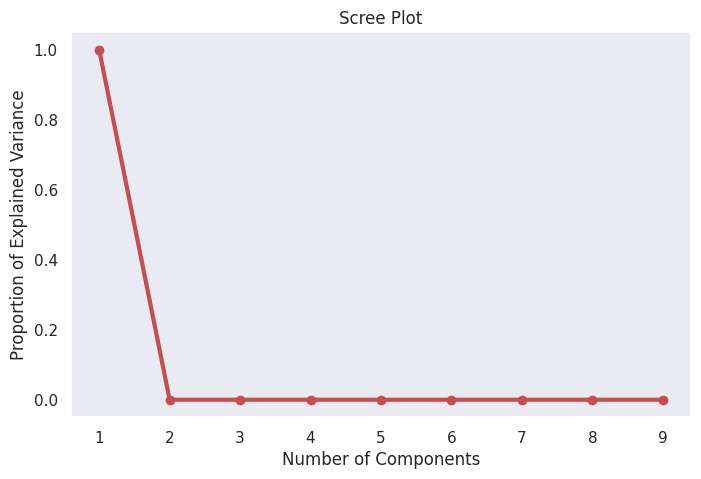

In [23]:

X_reduced = df[selected_features + ['defects']]
X_features = X_reduced.drop(columns=['defects'])  # Drop target column 'defects'


# Apply PCA to the selected features
pca = PCA()
pca.fit(X_features)

# Extract eigenvalues (explained variance)
Lambda = pca.explained_variance_

# Generate the Scree Plot
x = np.arange(len(Lambda)) + 1  # Component numbers
plt.figure(figsize=(8, 5))
plt.plot(x, Lambda / sum(Lambda), 'ro-', lw=3)  # Normalized eigenvalues
plt.xticks(x, [str(i) for i in x], rotation=0)  # Component labels
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Explained Variance')
plt.title("Scree Plot")
plt.grid()
plt.show()




**EXPLAINED VARIANCE**

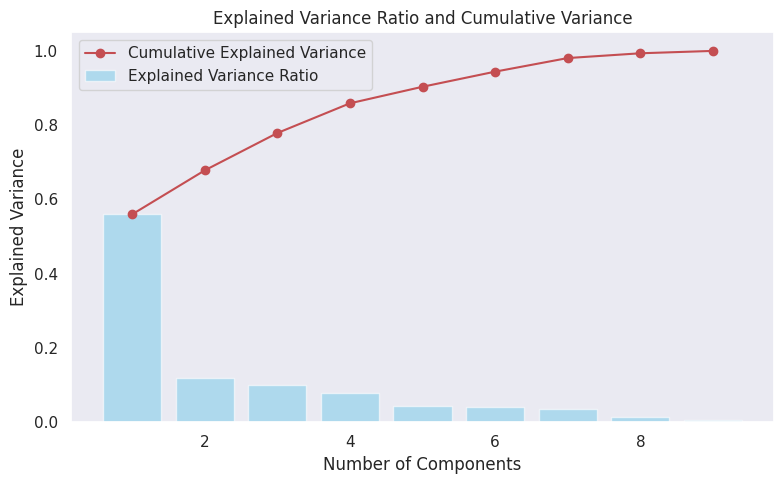

In [24]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
        alpha=0.6, label='Explained Variance Ratio', color='skyblue')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')

# Add labels and title
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title("Explained Variance Ratio and Cumulative Variance")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


**BIPLOT**




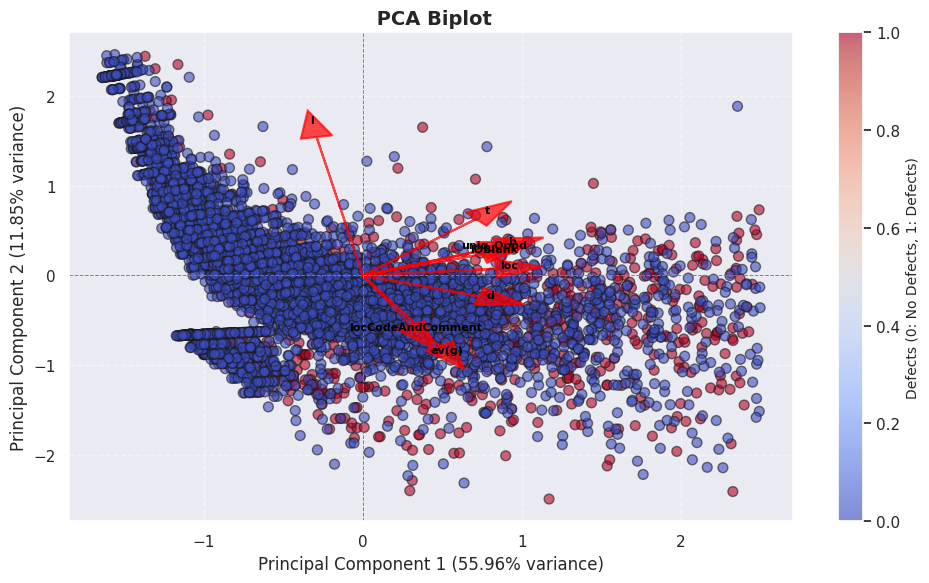

In [25]:
# Selected features and target column
selected_features = ['l', 'loc', 'uniq_Opnd', 'locCodeAndComment', 't', 'b', 'lOBlank', 'd', 'ev(g)']
X = df[selected_features]
y = df['defects']  # Target variable for coloring

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Get loadings (eigenvectors)
loadings = pca.components_.T

# Remove extreme outliers for visualization
# Filter points within 2 standard deviations
within_2std = (np.abs(principal_components) < 2.5).all(axis=1)
principal_components_filtered = principal_components[within_2std]
y_filtered = y[within_2std]

# Start plotting
plt.figure(figsize=(10, 6))

# Plot the observations
scatter = plt.scatter(principal_components_filtered[:, 0], principal_components_filtered[:, 1],
                      c=y_filtered, cmap='coolwarm', edgecolor='k', alpha=0.6, s=50, label='Data Points')

# Rescale and Add arrows for feature loadings
arrow_scale = 2  # Adjust arrow size relative to variance explained
for i, feature in enumerate(selected_features):
    plt.arrow(0, 0, loadings[i, 0] * arrow_scale, loadings[i, 1] * arrow_scale,
              color='red', alpha=0.7, linewidth=1.5, head_width=0.2, head_length=0.3)
    plt.text(loadings[i, 0] * (arrow_scale + 0.2), loadings[i, 1] * (arrow_scale + 0.2),
             feature, color='black', fontsize=8, weight='bold', ha='center')

# Add grid, labels, and title
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Horizontal axis line
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)  # Vertical axis line
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)", fontsize=12)
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)", fontsize=12)
plt.title(" PCA Biplot", fontsize=14, weight='bold')

# Add a color bar for the 'defects' variable
colorbar = plt.colorbar(scatter)
colorbar.set_label('Defects (0: No Defects, 1: Defects)', fontsize=10)

# Final layout adjustments
plt.tight_layout()
plt.show()


**TARGET DISTRIBUTION PLOT**

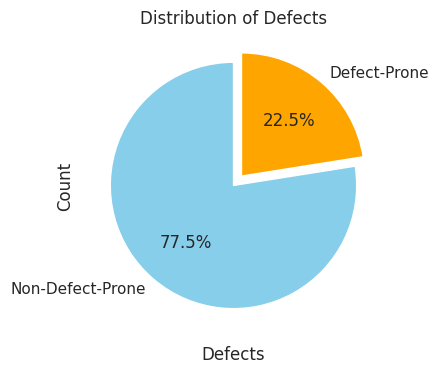

In [26]:
plt.figure(figsize=(6, 4))

class_counts = df['defects'].value_counts()
plt.pie(class_counts, labels=['Non-Defect-Prone', 'Defect-Prone'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], explode=[0, 0.1])
plt.title('Distribution of Defects')
plt.xlabel('Defects')
plt.ylabel('Count')
plt.show()

**PCA EXPLAINED VAIRANCE PLOT**

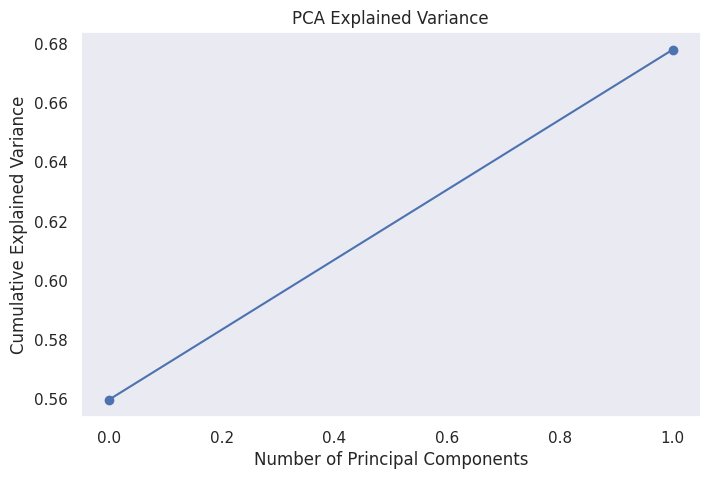

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Assuming 'df' contains your data and 'selected_features' are defined
# ... (Your previous code to load and prepare data) ...

# Split the data into training and testing sets
X = df[selected_features]  # Features
y = df['defects']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you can apply PCA to the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# ... (Rest of your code for plotting) ...

**CLASSIFICATIONS MODEL**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
X = df[selected_features]  # Features
y = df['defects']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)

(7126, 9)
(7126,)


In [31]:
print(X_test.shape)
print(y_test.shape)

(1782, 9)
(1782,)


**RANDOM FOREST BASED MODEL**

In [32]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.93      0.86      1365
        True       0.48      0.22      0.30       417

    accuracy                           0.76      1782
   macro avg       0.64      0.57      0.58      1782
weighted avg       0.72      0.76      0.73      1782

0.7626262626262627


In [35]:
def confusion_seaborn(y_true,y_pred):
    labels=unique_labels(y_test)
    column=[f'Predicted {label}'for label in labels]
    indices=[f'Actual {label}'for label in labels]
    table=pd.DataFrame(np.round((confusion_matrix(y_true,y_pred,normalize='true')),2),columns=column,index=indices)
    sns.set(rc = {'figure.figsize':(13,6)})
    return sns.heatmap(table,annot=True,cmap='Reds')

Text(0.5, 1.0, 'random forest')

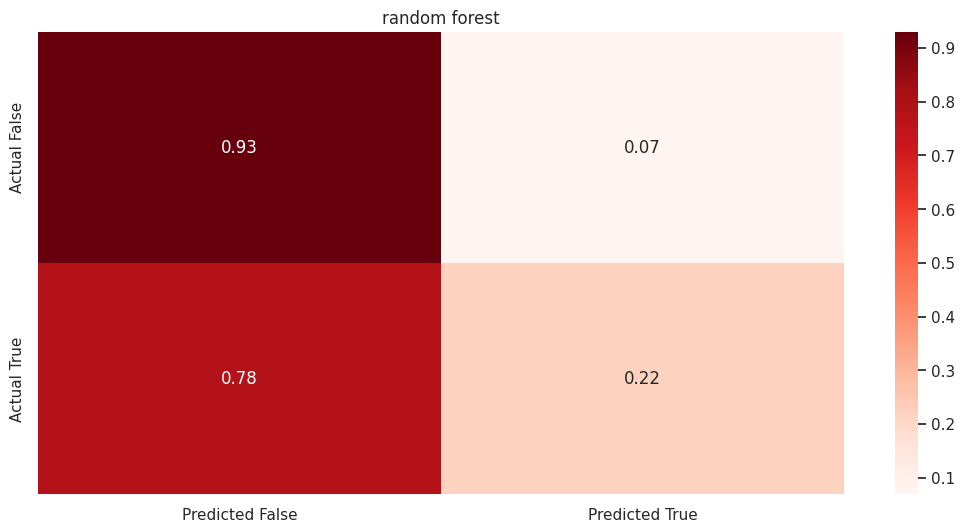

In [36]:
confusion_seaborn(y_test,y_pred)
plt.title("random forest")

**LOGISTIC REGRESSION**

In [37]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [38]:
y_pred = log_reg.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.98      0.87      1365
        True       0.58      0.10      0.16       417

    accuracy                           0.77      1782
   macro avg       0.68      0.54      0.52      1782
weighted avg       0.73      0.77      0.70      1782

0.7721661054994389


Text(0.5, 1.0, 'logistic regression')

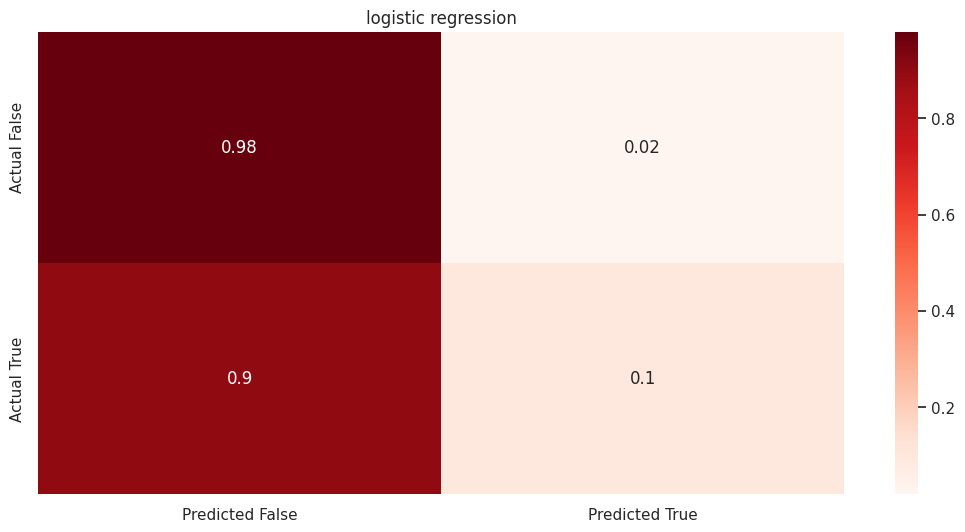

In [40]:
confusion_seaborn(y_test,y_pred)
plt.title("logistic regression")

**GRADIENT BOOSTING**

In [41]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
y_pred = gradient_boosting.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.97      0.87      1365
        True       0.59      0.12      0.20       417

    accuracy                           0.77      1782
   macro avg       0.69      0.55      0.54      1782
weighted avg       0.74      0.77      0.71      1782

0.7749719416386083


Text(0.5, 1.0, 'gradient boosting')

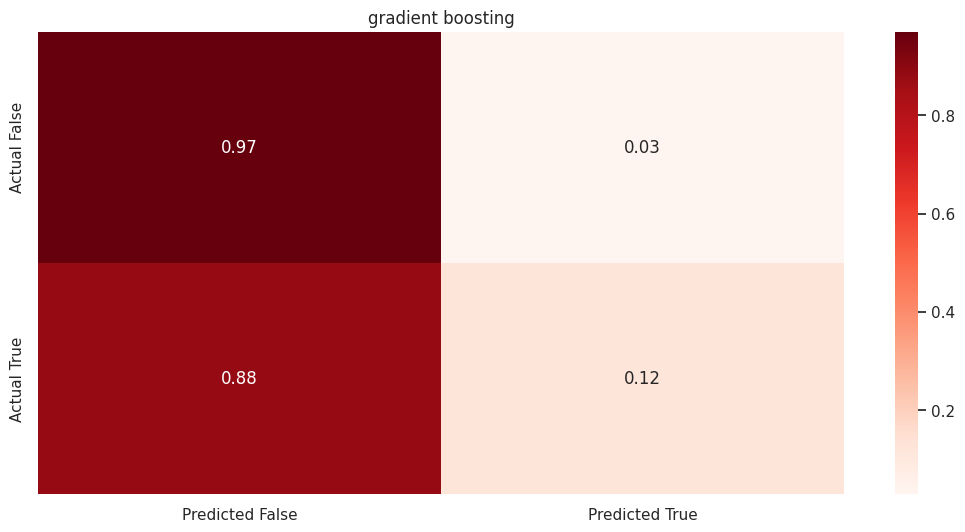

In [44]:
confusion_seaborn(y_test,y_pred)
plt.title("gradient boosting")

**Feature Importance Analysis For Random Forest**

In [45]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
feature_importances = rf_model.feature_importances_

In [47]:
importance_df = pd.DataFrame({'Feature': selected_features,'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

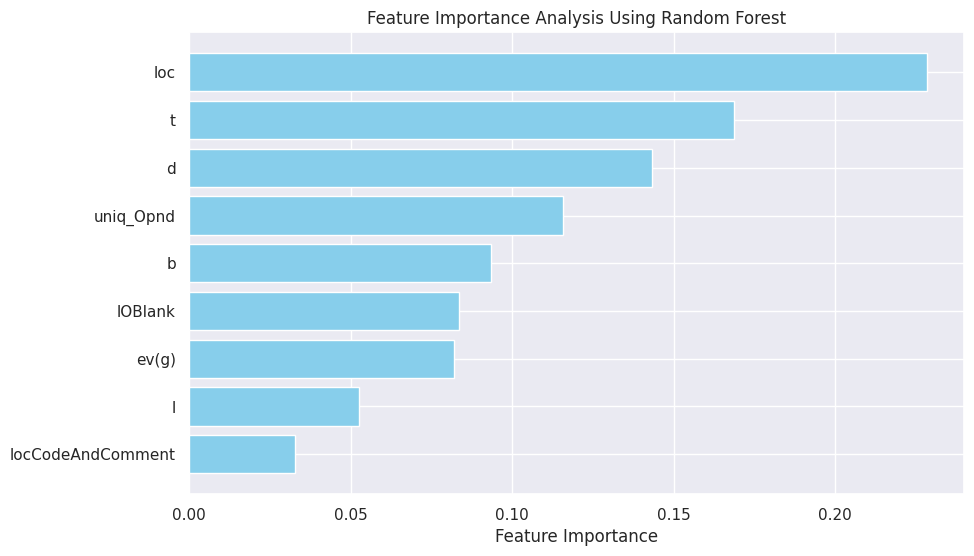

In [48]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.xlabel("Feature Importance")
plt.title("Feature Importance Analysis Using Random Forest")
plt.show()